In [1]:
!pip install plotly==5.14.1
!pip install "jupyterlab>=3" "ipywidgets>=7.6"
!pip install jupyter-dash
!pip install -U kaleido

In [2]:
import numpy as np
import pandas as pd
import openpyxl as xl
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
excel_path = r"./mock/titanium sols.xlsx"

In [4]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df = tables_dict["Table2"]['dataframe']
df = df.fillna(value=0)


worksheet name: Sheet1
tables in worksheet: 0

worksheet name: Experiment_data
tables in worksheet: 1
table name: Table1

worksheet name: Experiment_data_2
tables in worksheet: 1
table name: Table2


In [5]:
df.shape

(76, 9)

In [6]:
df.head()

,Composition mixtures,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l",ultrasound,"d, nm","Contents, %","Stability of sols, days"
0,H2O + HNO3 + TiIPO + ButOH,45,60,4.0,0.50,0.0,618.500,100.0,16.0
1,H2O + HNO3 + TiIPO + ButOH,80,10,4.0,0.50,0.0,978.100,100.0,16.0
2,H2O + HNO3 + TiIPO + ButOH,45,20,4.0,0.50,0.0,2.000,100.0,90.0
3,H2O + HNO3 + TiIPO + ButOH,45,20,4.0,0.47,0.0,2.628,100.0,60.0
4,H2O + HNO3 + TiIPO + IPOОН,50,20,4.0,0.20,0.0,1712.000,100.0,16.0


In [7]:
df.drop('Composition mixtures', axis=1).astype('float').describe().T

,count,mean,std,min,25%,50%,75%,max
"t, °С",76.0,61.592105,19.864996,20.00,45.000,70.0000,80.00,93.00
"t, min",76.0,31.236842,30.303737,8.00,11.000,13.5000,58.50,130.00
"с(acid), mol/l",76.0,1.004737,1.493205,0.10,0.100,0.1000,1.58,4.00
"с(Ti4+), mol/l",76.0,0.425526,0.191154,0.14,0.200,0.5000,0.60,0.62
ultrasound,76.0,0.157895,0.401751,0.00,0.000,0.0000,0.00,1.50
"d, nm",76.0,666.301395,924.147741,0.70,2.028,2.6955,2000.00,3096.00
"Contents, %",76.0,97.226316,13.895729,0.50,100.000,100.0000,100.00,100.00
"Stability of sols, days",76.0,24.657895,23.828864,0.00,2.000,16.0000,40.00,90.00


In [8]:
df.dtypes

Composition mixtures        object
t, °С                        int64
t, min                       int64
с(acid), mol/l             float64
с(Ti4+), mol/l             float64
ultrasound                 float64
d, nm                      float64
Contents, %                float64
Stability of sols, days    float64
dtype: object

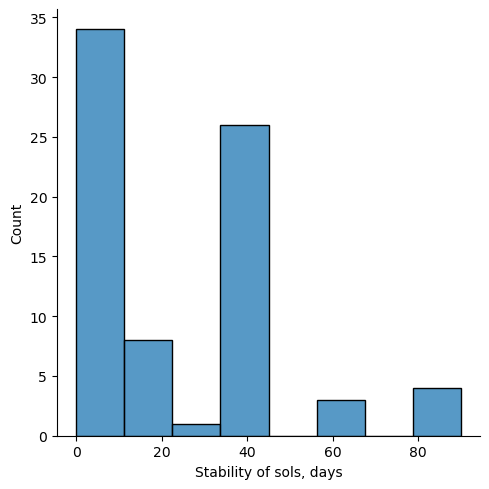

In [9]:
sns.displot(df['Stability of sols, days'])

<Axes: xlabel='t, °С', ylabel='d, nm'>

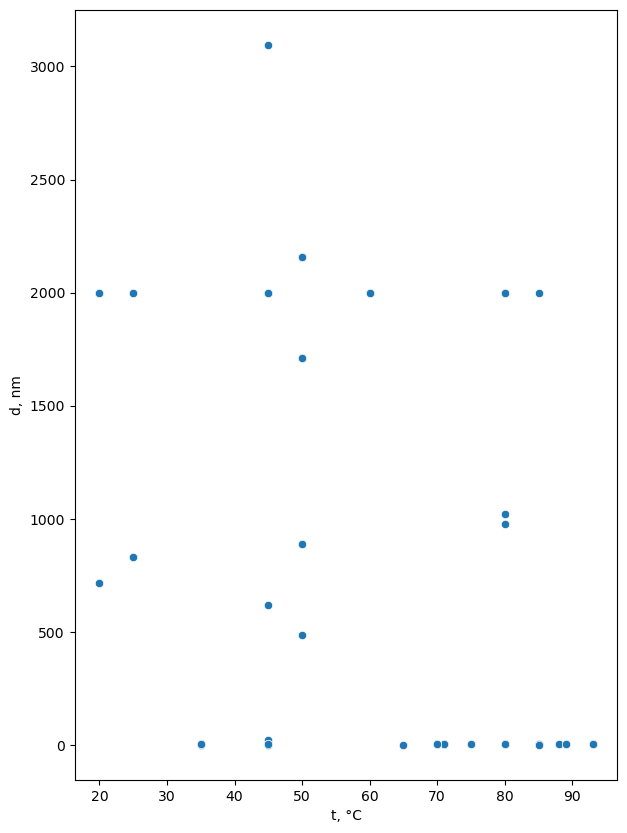

In [10]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.scatterplot(data=df, x='t, °С', y='d, nm', ax=ax)

<Axes: xlabel='с(acid), mol/l', ylabel='d, nm'>

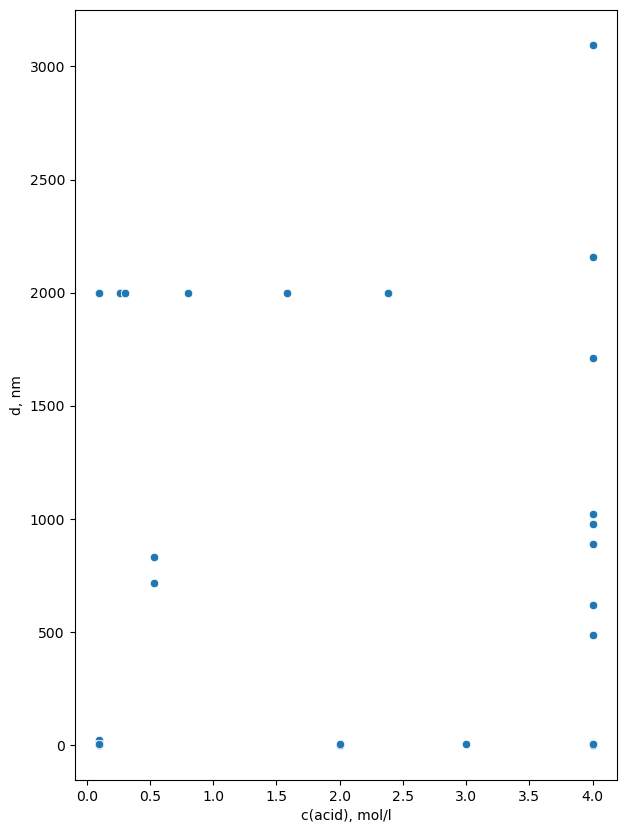

In [11]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.scatterplot(data=df, x='с(acid), mol/l', y='d, nm', ax=ax)

<Axes: xlabel='с(Ti4+), mol/l', ylabel='d, nm'>

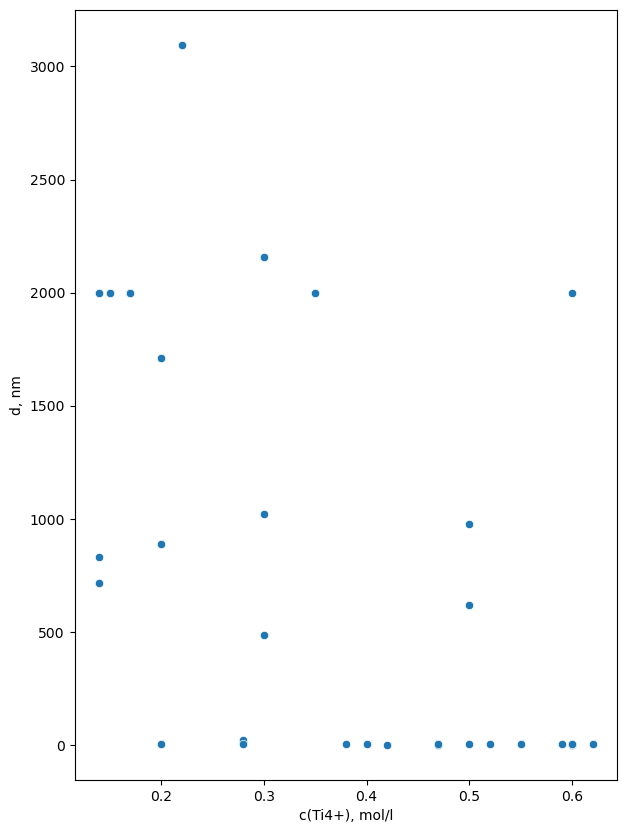

In [12]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.scatterplot(data=df, x='с(Ti4+), mol/l', y='d, nm', ax=ax)

<Axes: xlabel='t, min', ylabel='d, nm'>

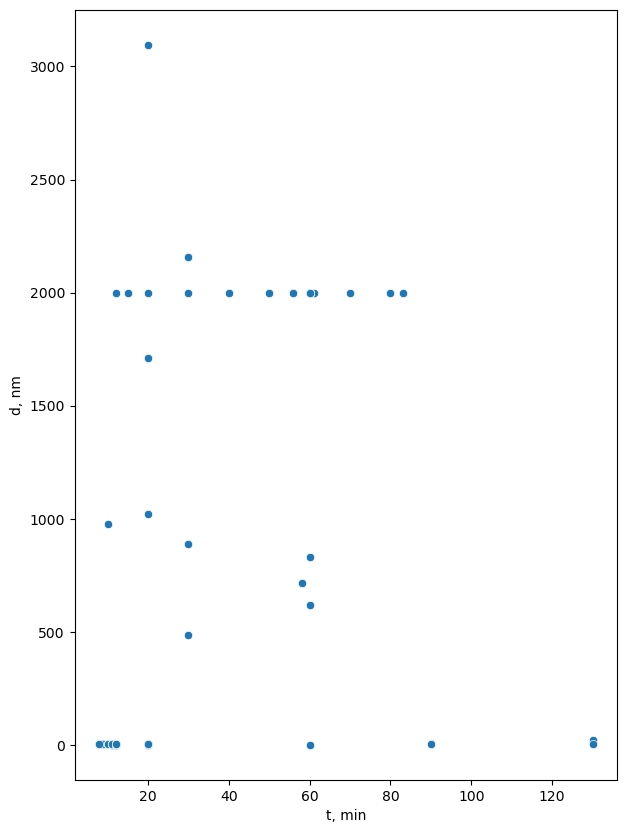

In [13]:
fig, ax = plt.subplots(figsize=(7, 10))
sns.scatterplot(data=df, x='t, min', y='d, nm', ax=ax)

In [14]:
X = df.drop(['Composition mixtures', 'Contents, %', 'd, nm', 'Stability of sols, days', 'ultrasound '], axis=1)
y_days = df['Stability of sols, days']
y_d = df['d, nm']
y_content = df['Contents, %']

In [15]:
X

,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l"
0,45,60,4.0,0.50
1,80,10,4.0,0.50
2,45,20,4.0,0.50
3,45,20,4.0,0.47
4,50,20,4.0,0.20
...,...,...,...,...
71,70,12,0.1,0.62
72,70,12,0.1,0.59
73,70,12,0.1,0.55
74,70,12,0.1,0.52


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept': [True, False]}

model = LinearRegression()
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y_days)
best_linear_regression_days = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(best_linear_regression_days.coef_)

-14.58291859997614
{'fit_intercept': False}
[-0.16239344 -0.14348742  5.17165432 79.93796575]


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

parameters = {'fit_intercept': [True, False]}

model = LinearRegression()
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X, y_d)
best_linear_regression_d = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(best_linear_regression_d.coef_)

-368.24754555121774
{'fit_intercept': True}
[  20.51977907 -280.85882185 -114.71075337 -954.93848214]


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept': [True, False]}

model = LinearRegression()
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y_content)
best_linear_regression_content = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(best_linear_regression_content.coef_)

-7.034565659695543
{'fit_intercept': True}
[ -0.14796999  -0.25009727  -2.29404887 -12.32332723]


In [19]:
!pip install -U pymoo

In [20]:
-np.append(best_linear_regression_days.coef_, best_linear_regression_days.intercept_)

array([  0.16239344,   0.14348742,  -5.17165432, -79.93796575,
        -0.        ])

In [76]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class SoleProblem(ElementwiseProblem):
    def __init__(self, coefs):
        self.coefs = coefs
        super().__init__(n_var=4, n_obj=2, n_ieq_constr=2,
                         xl=np.array([20, 5, 0.1, 0.14]),
                         xu=np.array([80, 130, 4, 0.47]) )

    def _evaluate(self, x, out, *args, **kwargs):
        fs = []
        gs = []
        for coef in self.coefs:
            f = coef[-1]
            for i in range(0, len(coef) - 1):
                f += x[i] * coef[i]    
            fs.append(f)
        out["F"] = fs
        out["G"] = [fs[0], -fs[1] + 0.01]


problem = SoleProblem(
    [-np.append(best_linear_regression_days.coef_, best_linear_regression_days.intercept_),
     np.append(best_linear_regression_d.coef_, best_linear_regression_d.intercept_)])

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 500),
               verbose=False,
               seed=1)

In [79]:
import plotly.express as px
F = res.F
fig = px.scatter(x=-F[:, 0], y=F[:, 1], labels={"x": "Stability of sols, days", "y": "d, nm"})
fig.write_html('first_figure.html', auto_open=True)
fig.write_image('mock/optimal.png')

In [80]:
for f, x in zip(res.F, res.X):
    print(f'For getting stability days = {round(-f[0], 3)} and diameter = {round(f[1], 3)} use:')
    print(f'\ttemperature = {round(x[0], 3)}')
    print(f'\ttime = {round(x[1], 3)}')
    print(f'\tc(acid) = {round(x[2], 3)}')
    print(f'\tc(Ti) = {round(x[3], 3)}')

For getting stability days = 44.364 and diameter = 0.01 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.964
	c(Ti) = 0.47
For getting stability days = 44.364 and diameter = 0.01 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.964
	c(Ti) = 0.47
For getting stability days = 44.364 and diameter = 0.01 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.964
	c(Ti) = 0.47
For getting stability days = 44.364 and diameter = 0.01 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.964
	c(Ti) = 0.47
For getting stability days = 44.364 and diameter = 0.01 use:
	temperature = 79.999
	time = 5.0
	c(acid) = 3.964
	c(Ti) = 0.47
For getting stability days = 44.364 and diameter = 0.01 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.964
	c(Ti) = 0.47
For getting stability days = 44.364 and diameter = 0.01 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.964
	c(Ti) = 0.47
For getting stability days = 44.364 and diameter = 0.01 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.964
	c(Ti) = 0.47
For ge